In [36]:
#Завантажити датасет Титанік
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
#Вивести перших 5 рядків.
file_path = '/content/drive/My Drive/titanic.csv'
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
#Визначити розмір датасета
df.shape

(418, 12)

In [39]:
#Визначити тип даних
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [40]:
#Визначити наявність пропущених значень.
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [41]:
#При наявності, замінити пропущені значення на середнє значення. Ще раз перевірити наявність пропущених значень.
df = df.fillna(df.mean(numeric_only=True), axis=0)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [42]:
#Перевірити наявність дублікатів. При наявності видалити дублікати.
duplicates = df.duplicated()
df_cleaned = df.drop_duplicates()
duplicates.sum()

0

In [43]:
#Вивести описову статистику датасету describe().
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [44]:
#Видалити стовпчик Cabin.
df = df.drop(columns=['Cabin'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [45]:
#Сформувати датасет з обраними стовпцями: ['Survived', 'Pclass', 'Sex', 'Age', 'Fare'].
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df_selected = df[selected_columns]
df_selected.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [46]:
#Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика).
unique_sex_values = df_selected['Sex'].unique()
print("Унікальні значення:", unique_sex_values)

df_selected.loc[:, 'Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})
df_selected.head()

Унікальні значення: ['male' 'female']


,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


In [47]:
#Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [48]:
#Вивести 5 перших рядків датасету.
df_selected.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


In [49]:
#Вивести 5 останніх рядків датасету.
df_selected.tail()

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,30.27259,8.0500
414,1,1,1,39.00000,108.9000
415,0,3,0,38.50000,7.2500
416,0,3,0,30.27259,8.0500
417,0,3,0,30.27259,22.3583


In [50]:
#Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?
survival_by_sex = df_selected.groupby('Sex')['Survived'].mean() * 100
print(survival_by_sex)

Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


In [51]:
#Обчисліть відсоток виживання для кожного класу (Pclass). Який клас мав найвищий рівень виживання (дати відповідь)?
survival_by_pclass = df_selected.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_pclass)

highest_survival_class = survival_by_pclass.idxmax()
highest_survival_rate = survival_by_pclass.max()

print(f"\nКлас з найвищим рівнем виживання: {highest_survival_class}")
print(f"Відсоток виживання для цього класу: {highest_survival_rate:.2f}%")

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

Клас з найвищим рівнем виживання: 1
Відсоток виживання для цього класу: 46.73%


In [53]:
#Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи впливає вік на виживання (дати відповідь)?
average_age_by_survival = df_selected.groupby('Survived')['Age'].mean()
print("Середній вік для тих, хто вижив і для тих, хто не вижив:")
print(average_age_by_survival)

survival_diff = average_age_by_survival[1] - average_age_by_survival[0]
if survival_diff > 0:
    print(f"\nСередній вік тих, хто вижив, вищий на {survival_diff:.2f} років, ніж середній вік тих, хто не вижив.")
elif survival_diff < 0:
    print(f"\nСередній вік тих, хто не вижив, вищий на {-survival_diff:.4f} років, ніж середній вік тих, хто вижив.")
else:
    print("\nСередній вік тих, хто вижив, і тих, хто не вижив, однаковий.")

Середній вік для тих, хто вижив і для тих, хто не вижив:
Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64

Середній вік тих, хто не вижив, вищий на 0.0003 років, ніж середній вік тих, хто вижив.


In [57]:
#Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи. Як тариф впливав на шанси виживання (дати відповідь)?
fare_bins = [0, 10, 20, 30, 40, 50, 100, 200, 500]
fare_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200+']
df_selected.loc[:, 'FareGroup'] = pd.cut(df_selected['Fare'], bins=fare_bins, labels=fare_labels, right=False, include_lowest=True)

survival_by_fare_group = df_selected.groupby('FareGroup', observed=True)['Survived'].mean().reset_index()
survival_by_fare_group['Survived'] *= 100

print("Рівень виживання для кожної категорії тарифів:")
print(survival_by_fare_group)

print("\nАналіз впливу тарифу на шанси виживання:")
print("Вищий рівень тарифу часто асоціюється з більшими шансами на виживання, але конкретні висновки залежать від даних.")

Рівень виживання для кожної категорії тарифів:
  FareGroup   Survived
0      0-10  27.096774
1     10-20  31.707317
2     20-30  40.000000
3     30-40  47.826087
4     40-50  28.571429
5    50-100  48.000000
6   100-200  53.846154
7      200+  64.705882

Аналіз впливу тарифу на шанси виживання:
Вищий рівень тарифу часто асоціюється з більшими шансами на виживання, але конкретні висновки залежать від даних.


In [59]:
#Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass). Чи існує значна різниця у тарифах між класами (дати відповідь)?
average_fare_by_class = df_selected.groupby('Pclass')['Fare'].mean()

print("Середній тариф для кожного класу:")
print(average_fare_by_class)

fare_diff = average_fare_by_class.max() - average_fare_by_class.min()
print(f"Максимальна різниця у тарифах між класами: {fare_diff:.2f}")

Середній тариф для кожного класу:
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64
Максимальна різниця у тарифах між класами: 81.71


In [61]:
#Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік пасажирів розподіляється за класами (дати відповідь)?
average_age_by_class = df_selected.groupby('Pclass')['Age'].mean()

print("Середній вік пасажирів для кожного класу:")
print(average_age_by_class)

Середній вік пасажирів для кожного класу:
Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


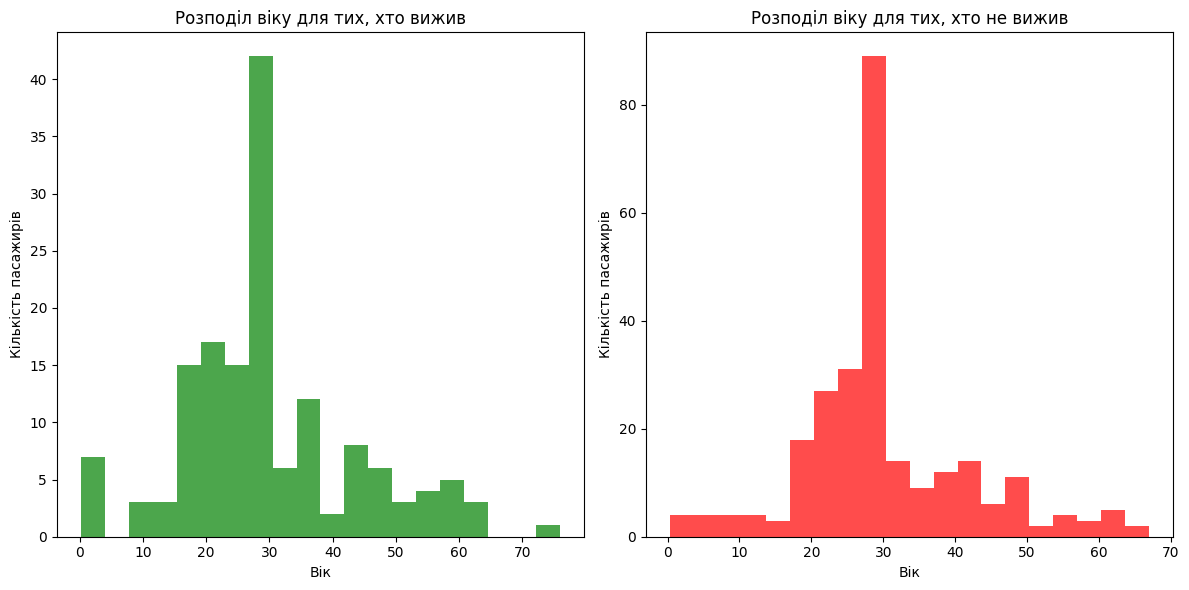

In [62]:
#Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив. Чи є видимі відмінності у вікових групах (дати відповідь)?
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_selected[df_selected['Survived'] == 1]['Age'].dropna(), bins=20, color='green', alpha=0.7)
plt.title('Розподіл віку для тих, хто вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')

plt.subplot(1, 2, 2)
plt.hist(df_selected[df_selected['Survived'] == 0]['Age'].dropna(), bins=20, color='red', alpha=0.7)
plt.title('Розподіл віку для тих, хто не вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.tight_layout()
plt.show()

In [63]:
#Обчисліть відсоток виживання для кожної комбінації статті та класу (наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група мала найвищий рівень виживання (дати відповідь)?
survival_by_sex_and_class = df_selected.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

print("Відсоток виживання для кожної комбінації статті та класу:")
print(survival_by_sex_and_class)

max_survival_group = survival_by_sex_and_class.idxmax()
max_survival_rate = survival_by_sex_and_class.max()

print("\nКомбінація з найвищим рівнем виживання:")
print(f"Стать: {'Жінка' if max_survival_group[0] == 1 else 'Чоловік'}, Клас: {max_survival_group[1]}")
print(f"Відсоток виживання: {max_survival_rate:.2f}%")

Відсоток виживання для кожної комбінації статті та класу:
Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64

Комбінація з найвищим рівнем виживання:
Стать: Жінка, Клас: 1
Відсоток виживання: 100.00%


In [69]:
#Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare). Які змінні найбільш сильно корелюють з виживанням (дати відповідь)?
correlation_matrix = df [['Survived', 'Pclass', 'Age', 'Fare']].corr()
print("Кореляція змінних: ")
print(correlation_matrix)

Кореляція змінних: 
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000


In [ ]:
#Висновок: на цій лабораторній роботі я На цій лабораторній роботі я проаналізувала дані пасажирів з Титаніка.
#Посилання на гітхаб: https://github.com/nastiadzen/Machine-learning